# ANALYSIS OF CAR MODELS 🛰 🚀 🛸 🚁

![](https://p4.wallpaperbetter.com/wallpaper/176/276/899/lamborghini-wallpaper-preview.jpg)

### Import Libraries and Dataset 🦚

- **Libraries**

In [1]:
# Main Packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# In case we want to ignore the warning parts @-@
import warnings
warnings.filterwarnings("ignore")

- **Dataset**

In [3]:
# See all csv files in the folder 🐯
import os
files = [f for f in os.listdir() if f.endswith(".csv")]
print(files)

[]


In [4]:
data= pd.read_csv("/kaggle/input/car-buyers/CarBuyers.csv")
# Sample of data
data.head(3)

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total
0,Ford,Focus,30.619322,5.966102,94.033898,1497.169492,petrol,814172,422731,"56,487",1293390
1,Ford,Fiesta,18.532143,5.714286,68.571429,1166.142857,petrol,554879,631666,"54,057",1240602
2,Volkswagen,Golf,31.242154,6.164835,89.461538,1537.406593,petrol,483216,310604,"47,563",841383


- Just a curiousity, why sum of num of male, female and unknown does not equal total number of owners, where the remaining owners are classified into ^^.

### Data Inspection and Pre-Processing 🦌

In [5]:
data.shape

(6092, 11)

In [6]:
data.columns

Index(['Manufacturer', 'Model', 'Price', 'Transmission', 'Power', 'Engine CC',
       'Fuel', 'Male', 'Female', 'Unknown', 'Total'],
      dtype='object')

- **Data Format**
- Categorical variables: 'Manufacturer', 'Model','Fuel'
- Numeric variables: 
    - Continuous: 'Price', 'Transmission', 'Power', 'Engine CC'
    - Discrete: 'Male', 'Female', 'Unknown', 'Total'

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  6092 non-null   object 
 1   Model         6092 non-null   object 
 2   Price         6092 non-null   float64
 3   Transmission  6092 non-null   float64
 4   Power         6092 non-null   float64
 5   Engine CC     6092 non-null   float64
 6   Fuel          6092 non-null   object 
 7   Male          6092 non-null   object 
 8   Female        6092 non-null   object 
 9   Unknown       6092 non-null   object 
 10  Total         6092 non-null   object 
dtypes: float64(4), object(7)
memory usage: 523.7+ KB


In [8]:
# We convert number of Male, female, unknown and total ownwers to integer 🐐
def to_int(x):
    return(int(x.replace(',','')))
for int_col in ['Male', 'Female', 'Unknown', 'Total']:
    data[int_col]= data[int_col].map(to_int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  6092 non-null   object 
 1   Model         6092 non-null   object 
 2   Price         6092 non-null   float64
 3   Transmission  6092 non-null   float64
 4   Power         6092 non-null   float64
 5   Engine CC     6092 non-null   float64
 6   Fuel          6092 non-null   object 
 7   Male          6092 non-null   int64  
 8   Female        6092 non-null   int64  
 9   Unknown       6092 non-null   int64  
 10  Total         6092 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 523.7+ KB


- There is no missing values in all attributes 

In [9]:
# Unique values of each categorical variable 🐩
unique_data= pd.DataFrame({'column':  ['Manufacturer', 'Model','Fuel']})
unique_data['is_unique']= unique_data['column'].apply(lambda x: data[x].is_unique)
unique_data['num unique val']= unique_data['column'].apply(lambda x: data[x].nunique())
unique_data['unique val']= unique_data['column'].apply(lambda x: data[x].unique())
unique_data

,column,is_unique,num unique val,unique val
0,Manufacturer,False,52,"[Ford, Volkswagen, Renault, BMW, Peugeot, Niss..."
1,Model,False,501,"[Focus, Fiesta, Golf, Clio, 320i, Polo, 206, M..."
2,Fuel,False,3,"[petrol, diesel, automatic]"


- There is no single attribute that can uniquely identify each record.  

In [10]:
# Some descriptive statistic of numeric vaiables 🦝
data.describe().round(2)

,Price,Transmission,Power,Engine CC,Male,Female,Unknown,Total
count,6092.00,6092.00,6092.00,6092.00,6092.00,6092.00,6092.00,6092.00
mean,41.23,5.13,111.48,1982.08,32924.63,20048.72,2458.24,55431.58
std,51.36,1.34,67.62,817.41,81261.67,60647.61,5797.11,141288.62
min,3.33,0.00,15.60,0.00,291.00,30.00,13.00,1001.00
25%,18.51,4.60,70.25,1497.13,2773.25,878.50,166.75,3940.25
50%,29.04,5.00,94.06,1832.89,8079.00,3366.00,548.00,12731.50
75%,43.86,5.97,121.86,2247.33,25322.00,12070.00,1937.00,40595.25
max,646.60,8.28,450.00,6208.00,1007113.00,789633.00,56487.00,1561512.00


### Basic EDA and Data Pre-processing 🐬 🐳 🐋

- I observe that there are many records with the same 'Manufacturer', 'Model', 'Price', 'Transmission', 'Power', 'Engine CC','Fuel' values, with different number of owners. I'll show you 

In [11]:
data.groupby(['Manufacturer', 'Model', 'Price', 'Transmission', 'Power', 'Engine CC','Fuel'],
             as_index=False)['Total'].count().head(5)

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Total
0,Abarth,500C,21.105625,5.000000,60.625000,1039.500000,petrol,4
1,Alfa-Romeo,145,17.427143,5.000000,87.714286,1696.428571,petrol,15
2,Alfa-Romeo,146,18.198429,5.000000,87.714286,1696.428571,petrol,15
3,Alfa-Romeo,147,25.343387,5.193548,95.096774,1802.774194,petrol,13
4,Alfa-Romeo,155,23.909333,5.000000,100.666667,2016.777778,petrol,13


In [12]:
# U can check others as well
mask1= data['Manufacturer']=='Abarth'
mask2= data['Model']=='500C'
data[mask1&mask2]

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total
281,Abarth,500C,21.105625,5.0,60.625,1039.5,petrol,2305,1697,180,4182
689,Abarth,500C,21.105625,5.0,60.625,1039.5,petrol,2081,1373,155,3609
1103,Abarth,500C,21.105625,5.0,60.625,1039.5,petrol,1637,1000,142,2779
1530,Abarth,500C,21.105625,5.0,60.625,1039.5,petrol,1101,649,93,1843


- One way to deal with this is to sum up all number of owners of the same type of record

In [13]:
data= data.groupby(['Manufacturer', 'Model', 'Price', 'Transmission', 'Power', 'Engine CC','Fuel'],
             as_index=False).sum()
data.head(3)

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total
0,Abarth,500C,21.105625,5.0,60.625000,1039.500000,petrol,7124,4719,570,12413
1,Alfa-Romeo,145,17.427143,5.0,87.714286,1696.428571,petrol,29993,11855,2186,44034
2,Alfa-Romeo,146,18.198429,5.0,87.714286,1696.428571,petrol,40928,14231,2969,58128


- Now, the composite key of Manufacturer and Model can uniquely identify a record. Lets check!

In [14]:
data.set_index(['Manufacturer','Model']).index.is_unique

True

**Car Owners by Gender** 🍄

In [15]:
data_gender= pd.DataFrame({'Gender':['Male', 'Female', 'Unknown']})
data_gender['Count']= data_gender['Gender'].apply(lambda x: data[x].sum())
data_gender['%']= data_gender['Count'].apply(lambda x: x/data_gender['Count'].sum())
data_gender

,Gender,Count,%
0,Male,200576818,0.593969
1,Female,122136776,0.361684
2,Unknown,14975599,0.044347


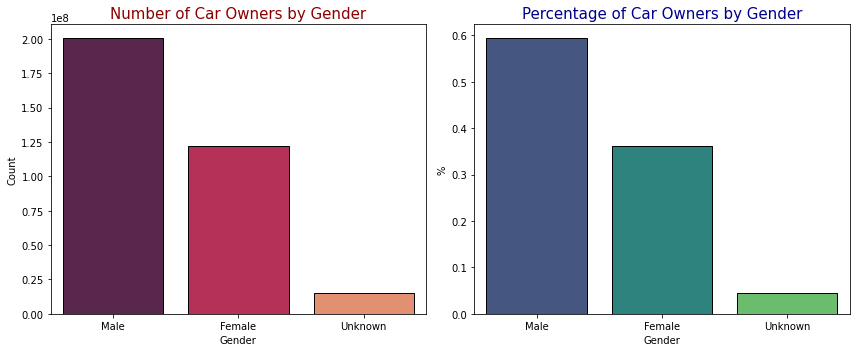

In [16]:
fig,ax=plt.subplots(ncols=2,figsize=(12,5))
sns.barplot(x='Gender', y='Count', data=data_gender, palette='rocket',edgecolor='black', ax=ax[0])
sns.barplot(x='Gender', y='%', data=data_gender, palette='viridis',edgecolor='black', ax=ax[1])
ax[0].set_title('Number of Car Owners by Gender', color='darkred', fontsize=15)
ax[1].set_title('Percentage of Car Owners by Gender', color='darkblue', fontsize=15)
fig.tight_layout();

- A majority of Car owners are male (with approximately 60%), amount of female owners is about two third, number of owners with unidentified-gender is of lowest with just under 5%. 

**Top Manufacturers by Number of Owners** 🍁

- I want to identify top manufacturers by amount of buyers, whether there is any dominated Manufacturers or not. 

In [17]:
top_manufacturer= data.groupby('Manufacturer', as_index=False)['Male', 'Female','Total'].sum()
top_manufacturer.head()

,Manufacturer,Male,Female,Total
0,Abarth,7124,4719,12413
1,Alfa-Romeo,764932,233389,1049063
2,Aston-Martin,76029,6444,85733
3,Audi,6150874,2191786,8792989
4,BMW,10556504,3334594,14612429


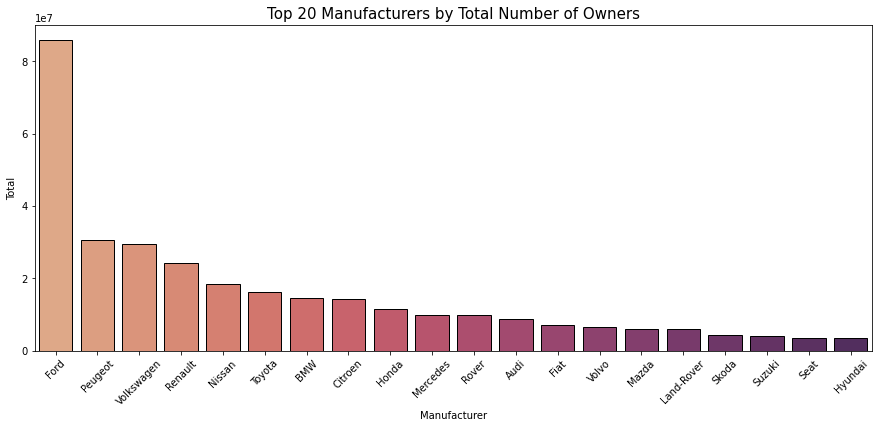

In [18]:
fig, ax= plt.subplots(figsize=(15,6))
sns.barplot(x='Manufacturer', y='Total',data=top_manufacturer.sort_values('Total',
            ascending=False).head(20), palette='flare',edgecolor='black', ax=ax)
ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Top 20 Manufacturers by Total Number of Owners', fontsize=15);

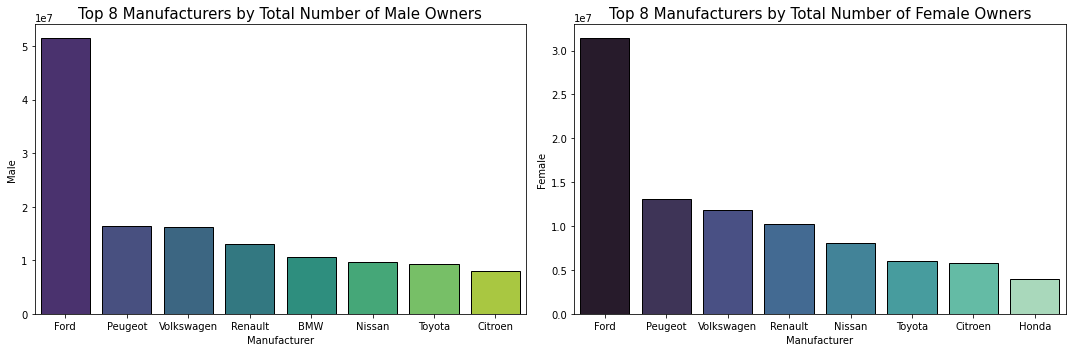

In [19]:
fig,ax= plt.subplots(ncols=2, figsize=(15,5))
sns.barplot(x='Manufacturer', y='Male',data=top_manufacturer.sort_values('Male',ascending=False).head(8),
           ax=ax[0], palette='viridis',edgecolor='black')
sns.barplot(x='Manufacturer', y='Female',data=top_manufacturer.sort_values('Female',ascending=False).head(8),
           ax=ax[1], palette='mako',edgecolor='black')
ax[0].set_title('Top 8 Manufacturers by Total Number of Male Owners', fontsize=15)
ax[1].set_title('Top 8 Manufacturers by Total Number of Female Owners', fontsize=15)
fig.tight_layout();

- In general, Ford is the one that dominates all charts in term of purchasers, the Top Manufacturers can be listed are Ford, Peugeot, Volkswagen, Renault. There is no significant differences in the choice of Manufacturers between male and female customers. 

**Top Models by number of owners** 🎍

- In similar spirit, we find top Models in term of number of owners.

In [20]:
top_model= data.groupby(['Model','Manufacturer'], as_index=False)['Male', 'Female','Total'].sum()
top_model.head()

,Model,Manufacturer,Male,Female,Total
0,09-May,Saab,374012,70387,471084
1,100,Audi,290434,55293,359404
2,1007,Peugeot,23987,24239,50864
3,104,Peugeot,5736,4970,10999
4,105,Skoda,13619,7141,21131


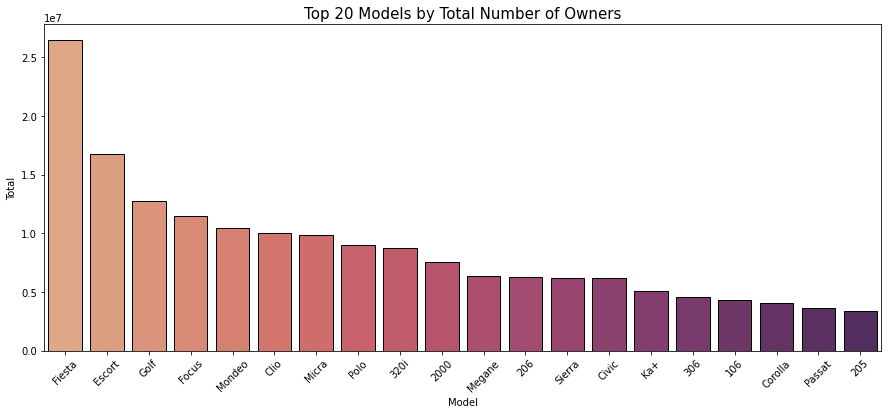

In [21]:
fig, ax= plt.subplots(figsize=(15,6))
sns.barplot(x='Model', y='Total',data=top_model.sort_values('Total',
            ascending=False).head(20), palette='flare', ax=ax,edgecolor='black')
ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Top 20 Models by Total Number of Owners', fontsize=15);

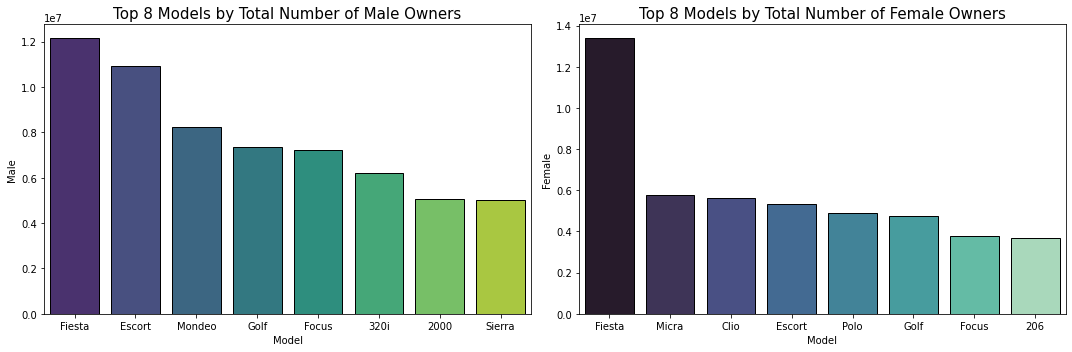

In [22]:
fig,ax= plt.subplots(ncols=2, figsize=(15,5))
sns.barplot(x='Model', y='Male',data=top_model.sort_values('Male',ascending=False).head(8),
           ax=ax[0], palette='viridis',edgecolor='black')
sns.barplot(x='Model', y='Female',data=top_model.sort_values('Female',ascending=False).head(8),
           ax=ax[1], palette='mako',edgecolor='black')
ax[0].set_title('Top 8 Models by Total Number of Male Owners', fontsize=15)
ax[1].set_title('Top 8 Models by Total Number of Female Owners', fontsize=15)
fig.tight_layout();

- All in all, in term of total number of owners, male or female owners, Fiesta is always placed at first position. 
- Interestingly, there is a notable differences in the choice of Male and Female buyers. For male buyers, Fiesta and Escort outnumbered all other models, however the gap is not significant. On the other hand, Fiesta dominates the figures of Female, the second top model (Micra) doesnt have even half of Fiesta amount. 
- In addition, except Fiesta,Golf and Focus, others appear in top preferrence for male, dont appear in Female chart. 

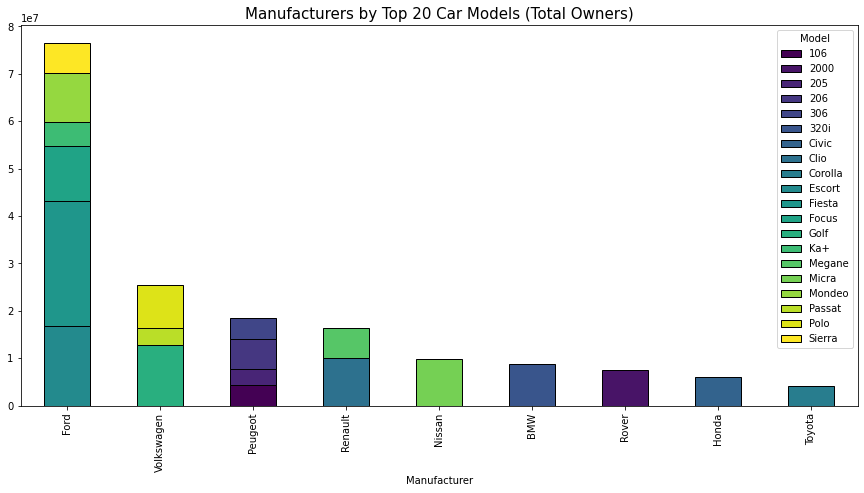

In [23]:
# We can see the Top Car models of each manufacturer, 
# and see how the results conincide with top ranked list of manufacturers 🔮
top_model_all=top_model.sort_values('Total',ascending=False).head(20).pivot_table(index='Manufacturer',
                 margins=True,aggfunc= np.sum,columns='Model',values='Total').sort_values('All',ascending=False)
fig,ax=plt.subplots(figsize=(15,7))
top_model_all.iloc[1:,:-1].plot(kind='bar', stacked='True',ax=ax, cmap='viridis', edgecolor='black')
ax.set_title('Manufacturers by Top 20 Car Models (Total Owners)', fontsize=15);

- We can see that most of the Manufacturers ranked on top number of owners have top models. Obvious one is Ford with up to 6 models ranked on top (One of them is the 'famous' Fiesta).
- However, there are some manufacturers listed on top 10 based on number of owners which does not have car model ranked on top 20. Lets check !!!

In [24]:
top_model_manu_all= top_model_all[1:].index.tolist()
top_manu_all= top_manufacturer.sort_values('Total',ascending=False).head(10)['Manufacturer'].tolist()
intersection= list(set(top_model_manu_all)&set(top_manu_all))
print('Manufacturers appear in both chart:\n',intersection)
print('Top Manufacturers with no Models on top 20:\n', set(top_manu_all)-set(intersection))

Manufacturers appear in both chart:
 ['Ford', 'Toyota', 'Volkswagen', 'Renault', 'BMW', 'Nissan', 'Peugeot', 'Honda']
Top Manufacturers with no Models on top 20:
 {'Mercedes', 'Citroen'}


- Similarly, we'll have a look at Manufacturers by Top ranked models by Male and Female Owners. 

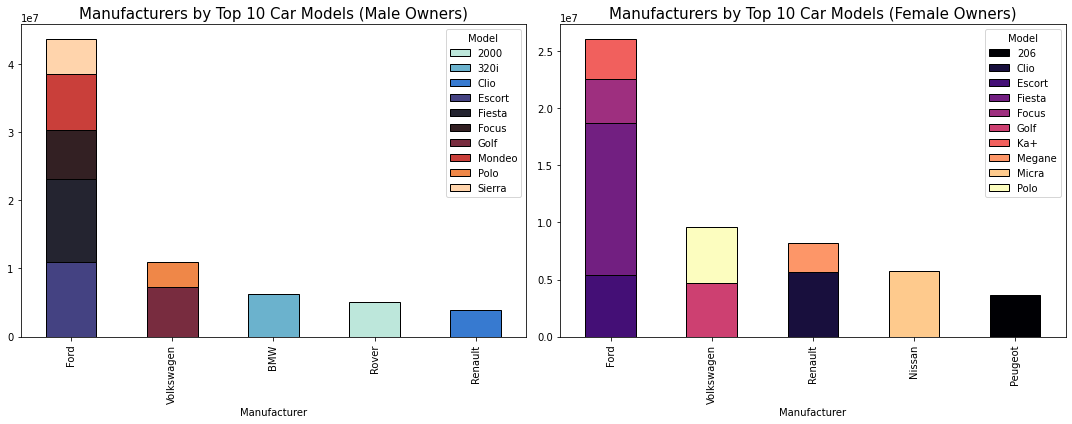

In [25]:
# Male Owners
top_model_male= top_model.sort_values('Male',ascending=False).head(10).pivot_table(index='Manufacturer',
                 margins=True,aggfunc= np.sum,columns='Model',values='Male').sort_values('All',ascending=False)
# Female Owners
top_model_female= top_model.sort_values('Female',ascending=False).head(10).pivot_table(index='Manufacturer',
                 margins=True,aggfunc= np.sum,columns='Model',values='Female').sort_values('All',ascending=False)
# Viz Time !
fig, ax= plt.subplots(ncols=2, figsize=(15,6))
top_model_male.iloc[1:,:-1].plot(kind='bar',stacked=True, cmap='icefire',ax=ax[0], edgecolor='black')
top_model_female.iloc[1:,:-1].plot(kind='bar', stacked=True, cmap='magma', ax=ax[1], edgecolor='black')
ax[0].set_title('Manufacturers by Top 10 Car Models (Male Owners)', fontsize=15)
ax[1].set_title('Manufacturers by Top 10 Car Models (Female Owners)', fontsize=15)
fig.tight_layout();

**A few insights of Fuel attribute** 🧬

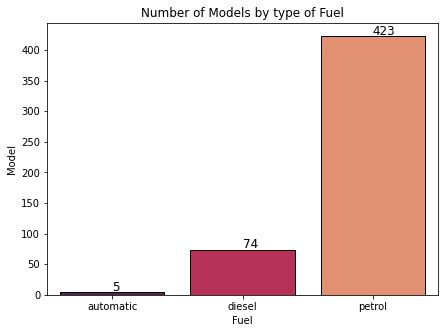

In [26]:
fuel_data= data.groupby('Fuel', as_index=False)['Model'].count()
fig, ax= plt.subplots(figsize=(7,5))
sns.barplot(x='Fuel', y='Model', data=fuel_data, palette='rocket', edgecolor='black', ax=ax)
ax.set_title('Number of Models by type of Fuel', fontsize=12)
for i,v in enumerate(fuel_data['Model'].tolist()):
    ax.text(x=i, y=v+2, s=f"{v}" , fontdict=dict(fontsize=12))

- Clearly, most of the car models use Petrol as their fuel (up to 85%), automatic fuel and diesel are accounted for humble amount , may be because it is too expensive @-@. Lets check !

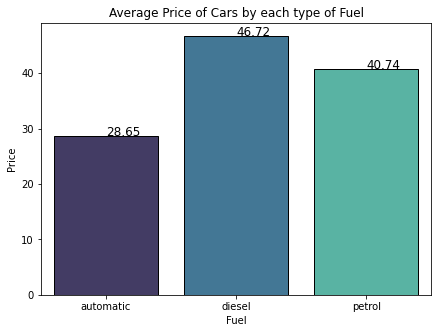

In [27]:
fig, ax= plt.subplots(figsize=(7,5))
df= data.groupby('Fuel',as_index=False)['Price'].mean()
sns.barplot(x='Fuel', y='Price', data= df
            , palette='mako', edgecolor='black', ax=ax)
ax.set_title('Average Price of Cars by each type of Fuel', fontsize=12)
for i,v in enumerate(df['Price'].tolist()):
    ax.text(x=i, y=v, s=f"{np.round(v,2)}" , fontdict=dict(fontsize=12))

- Surprisingly, There is no significant gap between the Average price for Cars using Petrol and other 2, so Price is not a decisive factor determining why so many car models using this type of fuel. 

**Histogram, Correlation Matrix Plot and Pair Plot for Numeric variables** 🐇

- I aim to use some Regression models to predict the Price of Cars,hence, there is a need to explore the relationship between 'potential' predictors ('Transmission', 'Power', 'Engine CC') and Price variable (our target)

In [28]:
predictor= ['Transmission', 'Power', 'Engine CC']
target= 'Price'

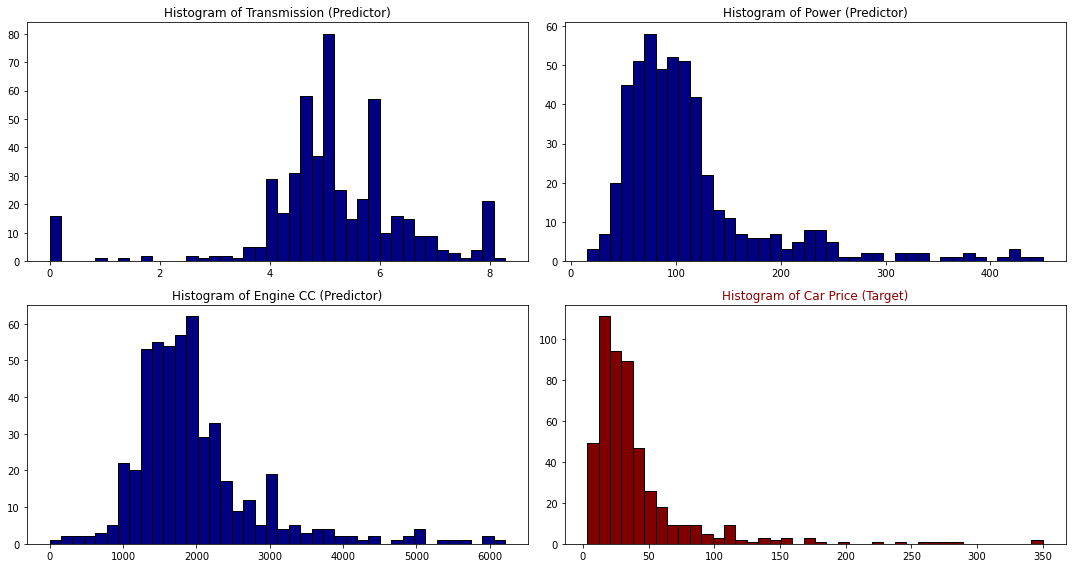

In [29]:
# Histogram of all Variables
fig, ax= plt.subplots(nrows= 2, ncols=2, figsize=(15,8))
ax_index=[ax[0,0],ax[0,1],ax[1,0]]
ax[1,1].hist(data[target].clip(upper=350),bins=40,color='maroon', edgecolor='black')
ax[1,1].set_title('Histogram of Car Price (Target)', color='darkred')
for i in range(3):
    ax_index[i].hist(data[predictor[i]],bins=40,color='navy', edgecolor='black')
    ax_index[i].set_title(f'Histogram of {predictor[i]} (Predictor)')
fig.tight_layout();

- Actually, There is not much things interpretted from these histogram. The Price (target) is extremely right-skewed (so we may expect there are some outliers here), while the level of skewness is lower in the predictors. 
- All variables seem to follow bell-shaped distribution, except for transmission which has unclear distribution. Nonetheless, these are not big problems, lets see relationship amongs variables !

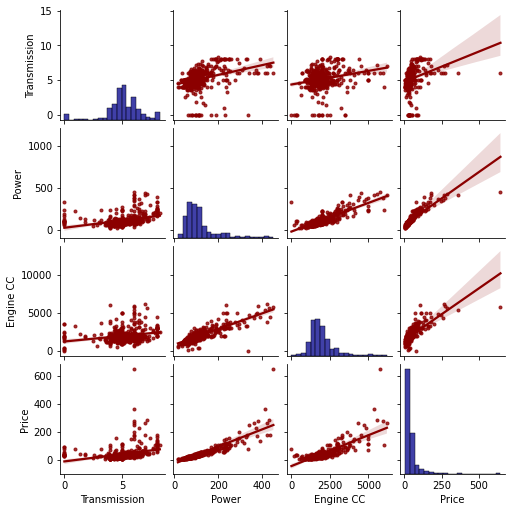

In [30]:
sns.pairplot(data=data[predictor+[target]], kind='reg', diag_kws={'bins':20, 'color':'darkblue','edgecolor':'black'},
            plot_kws={'marker':'.','color':'darkred'}, size=1.8);

- By the scatter plot of predictor variables against Price, we can see strong relationship 
- We can observe that there are a few data points (2-6 points) that the price is extremely high, which may affect the performance of Regression model, we have to handle these points ! 
- I use Capping to deal with these points, in other words, all price record over 99% quantitle (5 points)'ll be replaced by 99% quantile value. Let see the result. 

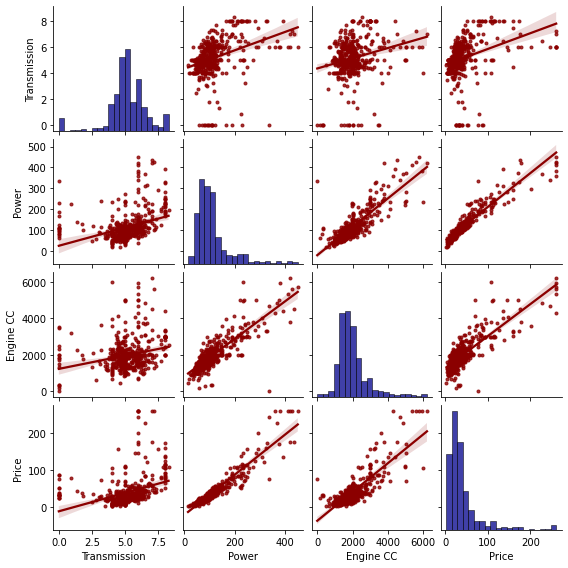

In [31]:
data2= data.copy()
data2['Price']= data2['Price'].clip(upper=data['Price'].quantile(0.99))
sns.pairplot(data=data2[predictor+[target]], kind='reg', diag_kws={'bins':20, 'color':'darkblue','edgecolor':'black'},
            plot_kws={'marker':'.','color':'darkred'}, size=2);

- Now, they look much better, Lets see how variables are correlated with each other. 

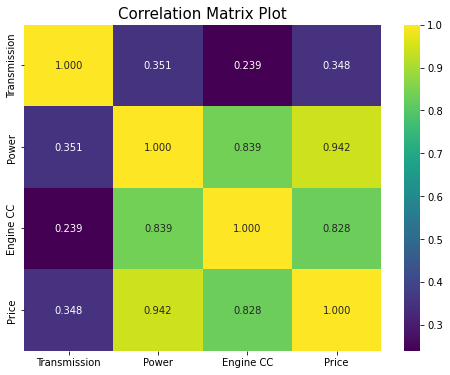

In [32]:
# Correlation Matrix plot 🎎
fig, ax= plt.subplots(figsize=(8,6))
sns.heatmap(data2[predictor+[target]].corr(), annot=True, cmap='viridis',
            fmt='0.3f',ax=ax)
ax.set_title('Correlation Matrix Plot', fontsize=15);

- Interestingly, the Price is positively highly-correlated with Engine CC (0.828) and Power (0.942), while the relationship seems unsignificant btw Price and Transmission (0.348)
- Additionally, we see high correlation btw Power and Engine CC, which may cause Multi-Collinearity in our regression model. We can use VIF metric to check our assumption. 

In [33]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=data2[predictor]
vif_info= pd.DataFrame()
vif_info['Column']= X.columns
vif_info['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info

,Column,VIF
0,Transmission,5.650988
1,Power,11.321799
2,Engine CC,16.026928


- High value of VIF of Power and Engine CC indicates that they are highly collinear with other variables in the model.
- Simplest way (but usually not recommended) is to drop the one with highest value of VIF, which is Engine CC in this case. 

In [34]:
# Lets see VIF measures when we drop Engine CC variable 🚨 
X=data2[['Transmission','Power']]
vif_info= pd.DataFrame()
vif_info['Column']= X.columns
vif_info['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info

,Column,VIF
0,Transmission,3.99193
1,Power,3.99193


- Now, the value of VIF is much lower (less than 5), so we can be certain that there is no multilinearity that can affect the result of our regression models. 

## Trainning Regression Models 🚀

### Simple Linear Regression Model 🔫

- We use only Power as the predictor for Price

**Independent and Dependent variables** 🚦 🚥

In [35]:
X= data2['Power'].values
y= data2['Price'].values
X= X.reshape(-1,1)
y=y.reshape(-1,1)
display(X[:3], y[:3])

array([[60.625     ],
       [87.71428571],
       [87.71428571]])

array([[21.105625  ],
       [17.42714286],
       [18.19842857]])

**Train-Test Split** ⚖️

In [36]:
# Split the data into train (80%) and test (20%) set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=0)

**Training the model on Train set** 🛒

In [37]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train, y_train) 

LinearRegression()

In [38]:
# Model coefficients 
display(regressor.coef_, regressor.intercept_)

array([[0.54691679]])

array([-20.86068562])

**Model Performance** 📚

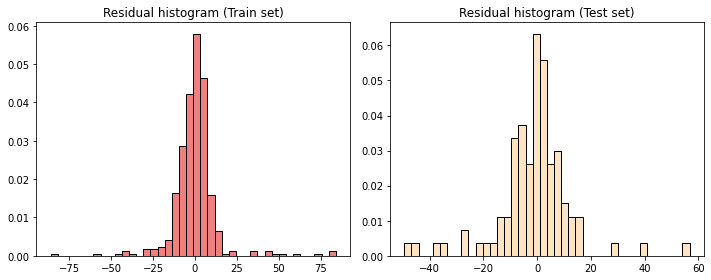

In [39]:
# Prediction on the train and test set 
train_diff= y_train- regressor.predict(X_train)
test_diff = y_test - regressor.predict(X_test)
fig,ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].hist(train_diff, bins=40, color='lightcoral', edgecolor='black', density =True)
ax[1].hist(test_diff, bins=40, color='bisque', edgecolor='black', density =True)
ax[0].set_title('Residual histogram (Train set)')
ax[1].set_title('Residual histogram (Test set)')
fig.tight_layout();

In [40]:
print('Mean of Residuals:',[np.mean(train_diff), np.mean(test_diff)])
print('Var of Residuals:',[np.var(train_diff), np.var(test_diff)])

Mean of Residuals: [-1.6301728600979855e-15, -1.221407668508349]
Var of Residuals: [186.68135100591448, 190.30383423215596]


In [41]:
# R2 measure
from sklearn.metrics import r2_score
display(r2_score(y_train,regressor.predict(X_train)),r2_score(y_test,regressor.predict(X_test)))

0.8930195998011115

0.8564492853895673

- The model perform quite well with no significant difference in performance of train and test set. 

**Model Visualization** 🧮

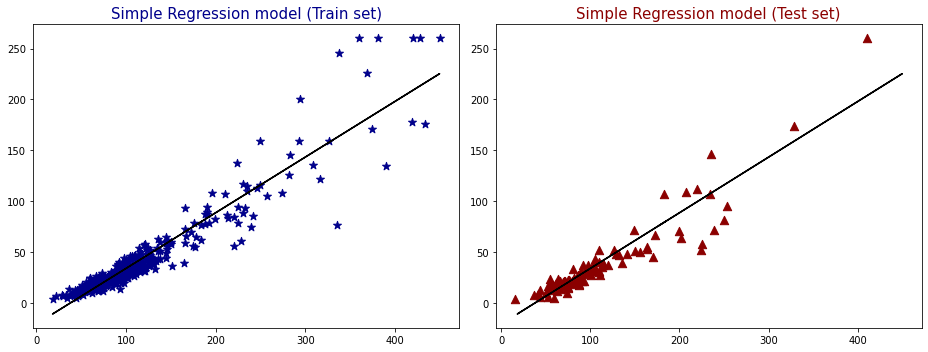

In [42]:
fig,ax= plt.subplots(ncols=2, figsize=(13,5))
# Train set
ax[0].scatter(X_train, y_train, color = 'darkblue', marker='*', s=70)
ax[0].plot(X_train, regressor.predict(X_train), color = 'black')
ax[0].set_title('Simple Regression model (Train set)', color='darkblue', fontsize=15)
# Test set
ax[1].scatter(X_test, y_test, color = 'darkred', marker='^', s=70)
ax[1].plot(X_train, regressor.predict(X_train), color = 'black')
ax[1].set_title('Simple Regression model (Test set)', color='darkred', fontsize=15)
fig.tight_layout()

### Multiple Linear Regression Model 🦠

- We use both Transmission and Power as predictors in this model

**Independent and Dependent variables** 🚦 🚥

In [43]:
X= data2[['Transmission', 'Power']].values
y= data2['Price'].values
display(X[:3], y[:3])

array([[ 5.        , 60.625     ],
       [ 5.        , 87.71428571],
       [ 5.        , 87.71428571]])

array([21.105625  , 17.42714286, 18.19842857])

**Train-Test Split** ⚖️

In [44]:
# Split the data into train (80%) and test (20%) set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=0)

**Training the model on Train set** 🛒

In [45]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train, y_train) 

LinearRegression()

In [46]:
# Model coefficients 
display(regressor.coef_, regressor.intercept_)

array([1.0862037 , 0.53967836])

-25.611525619433323

**Model Performance** 📚

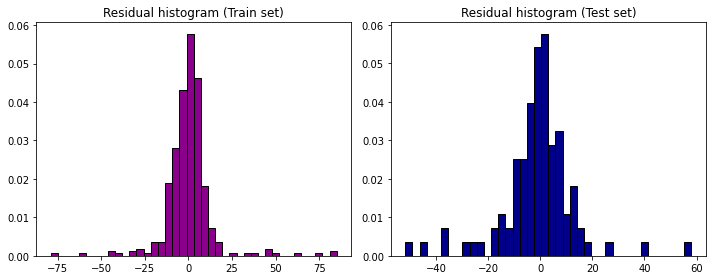

In [47]:
# Prediction on the train and test set 
train_diff= y_train- regressor.predict(X_train)
test_diff = y_test - regressor.predict(X_test)
fig,ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].hist(train_diff, bins=40, color='darkmagenta', edgecolor='black', density =True)
ax[1].hist(test_diff, bins=40, color='darkblue', edgecolor='black', density =True)
ax[0].set_title('Residual histogram (Train set)')
ax[1].set_title('Residual histogram (Test set)')
fig.tight_layout();

In [48]:
print('Mean of Residuals:',[np.mean(train_diff), np.mean(test_diff)])
print('Var of Residuals:',[np.var(train_diff), np.var(test_diff)])

Mean of Residuals: [-6.62700706170268e-15, -1.2288782827676352]
Var of Residuals: [184.51230489182927, 198.74537946881273]


In [49]:
# R2 measure
from sklearn.metrics import r2_score
display(r2_score(y_train,regressor.predict(X_train)),r2_score(y_test,regressor.predict(X_test)))

0.8942626024903696

0.8501174554719371

- The model perform quite well with no significant difference in performance of train and test set. 

**Model Visualization** 🧮

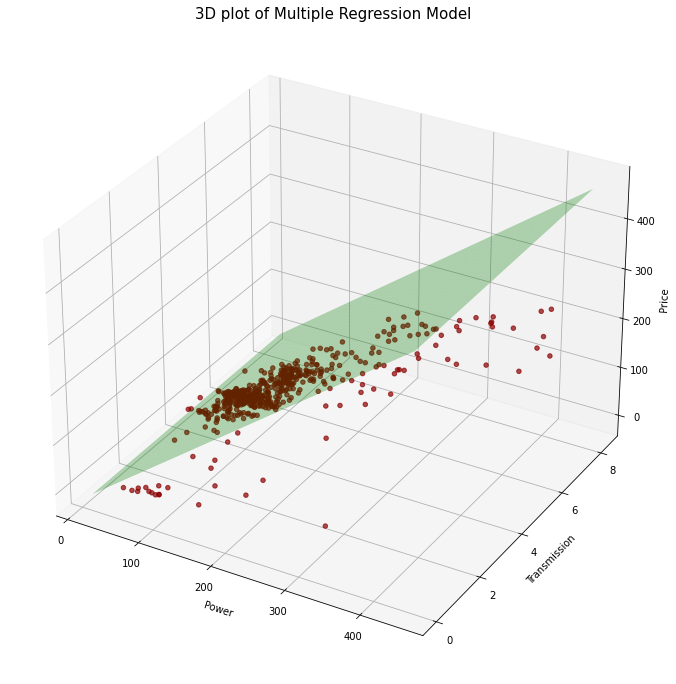

In [50]:
x_surf, y_surf = np.meshgrid(np.linspace(data2['Power'].min(),data2['Power'].max(), 100),
                             np.linspace(data2['Transmission'].min(),data2['Transmission'].max(), 100))
X = pd.DataFrame({'Power': x_surf.ravel(), 'Transmission': y_surf.ravel()})
Y=regressor.predict(X)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(22,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data2['Power'],data2['Transmission'],data2['Price'],c='darkred', marker='o', alpha=0.7)
ax.plot_surface(x_surf,y_surf,Y.reshape(x_surf.shape), color='green', alpha=0.3)
ax.set_xlabel('Power')
ax.set_ylabel('Transmission')
ax.set_zlabel('Price')
ax.set_title('3D plot of Multiple Regression Model', fontsize=15);

### Support Vector Regression Model ⚖️

**Independent and Dependent variables** 🚦 🚥

In [51]:
X= data2['Power'].values
y= data2['Price'].values
X= X.reshape(-1,1)
y=y.reshape(-1,1)
display(X[:3], y[:3])

array([[60.625     ],
       [87.71428571],
       [87.71428571]])

array([[21.105625  ],
       [17.42714286],
       [18.19842857]])

**Feature Scaling** 🏮

In [52]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

**Train-Test Split** ⚖️

In [53]:
# Split the data into train (80%) and test (20%) set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=0)

**Training the model on Train set** 🛒

In [54]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [55]:
# Parameters
regressor.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

**Model Performance** 📚

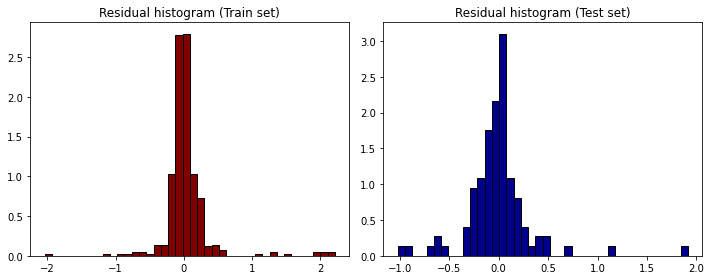

In [56]:
# Prediction on the train and test set 
train_diff= y_train- regressor.predict(X_train).reshape(-1,1)
test_diff = y_test - regressor.predict(X_test).reshape(-1,1)
fig,ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].hist(train_diff, bins=40, color='maroon', edgecolor='black', density =True)
ax[1].hist(test_diff, bins=40, color='darkblue', edgecolor='black', density =True)
ax[0].set_title('Residual histogram (Train set)')
ax[1].set_title('Residual histogram (Test set)')
fig.tight_layout();

In [57]:
print('Mean of Residuals:',[np.mean(train_diff), np.mean(test_diff)])
print('Var of Residuals:',[np.var(train_diff), np.var(test_diff)])

Mean of Residuals: [0.02953138162347179, -0.007939518175634567]
Var of Residuals: [0.12332167386130714, 0.11498272388350327]


In [58]:
# R2 measure
from sklearn.metrics import r2_score
display(r2_score(y_train,regressor.predict(X_train).reshape(-1,1)),
        r2_score(y_test,regressor.predict(X_test).reshape(-1,1)))

0.8816000125654868

0.8567529405399644

- The model perform quite well with no significant difference in performance of train and test set. 

**Model Visualization** 🧮

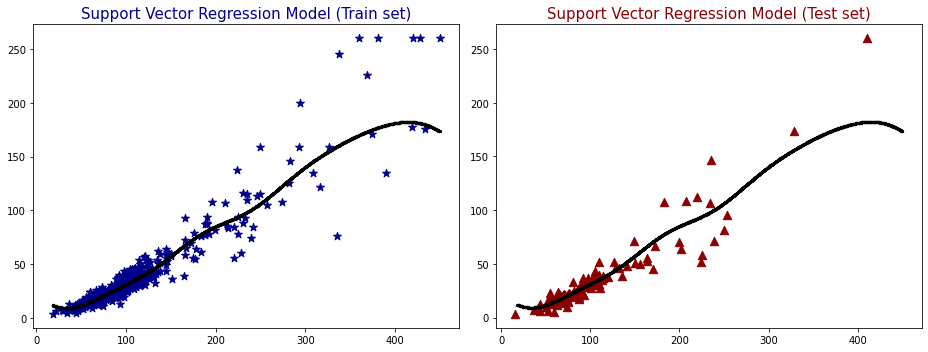

In [59]:
min_X, max_X= np.min(X_train),np.max(X_train)
X_grid= np.linspace(min_X, max_X, 1000).reshape(-1,1)
fig,ax= plt.subplots(ncols=2, figsize=(13,5))
# Train set
ax[0].scatter(sc_X.inverse_transform(X_train), sc_y.inverse_transform(y_train), color = 'darkblue', marker='*', s=70)
ax[0].scatter(sc_X.inverse_transform(X_grid), sc_y.inverse_transform(regressor.predict(X_grid)), color = 'black',s=5)
ax[0].set_title('Support Vector Regression Model (Train set)', color='darkblue', fontsize=15)
# Test set
ax[1].scatter(sc_X.inverse_transform(X_test), sc_y.inverse_transform(y_test), color = 'darkred', marker='^', s=70)
ax[1].scatter(sc_X.inverse_transform(X_grid), sc_y.inverse_transform(regressor.predict(X_grid)), color = 'black',s=5)
ax[1].set_title('Support Vector Regression Model (Test set)', color='darkred', fontsize=15)
fig.tight_layout()

### Random Forest Regression 🧮

- We use only Power as the predictor for Price

**Independent and Dependent variables** 🚦 🚥

In [60]:
X= data2['Power'].values
y= data2['Price'].values
X= X.reshape(-1,1)
y=y.reshape(-1,1)
display(X[:3], y[:3])

array([[60.625     ],
       [87.71428571],
       [87.71428571]])

array([[21.105625  ],
       [17.42714286],
       [18.19842857]])

**Train-Test Split** ⚖️

In [61]:
# Split the data into train (80%) and test (20%) set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=0)

**Training the model on Train set** 🛒

In [62]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

In [63]:
# Parameters
regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

**Model Performance** 📚

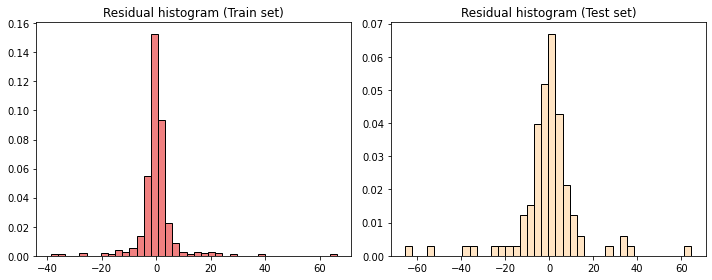

In [64]:
# Prediction on the train and test set 
train_diff= y_train- regressor.predict(X_train).reshape(-1,1)
test_diff = y_test - regressor.predict(X_test).reshape(-1,1)
fig,ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].hist(train_diff, bins=40, color='lightcoral', edgecolor='black', density =True)
ax[1].hist(test_diff, bins=40, color='bisque', edgecolor='black', density =True)
ax[0].set_title('Residual histogram (Train set)')
ax[1].set_title('Residual histogram (Test set)')
fig.tight_layout();

In [65]:
print('Mean of Residuals:',[np.mean(train_diff), np.mean(test_diff)])
print('Var of Residuals:',[np.var(train_diff), np.var(test_diff)])

Mean of Residuals: [0.08670683244059903, -0.6874825074531411]
Var of Residuals: [49.71461206428799, 225.92847171366142]


In [66]:
# R2 measure
from sklearn.metrics import r2_score
display(r2_score(y_train,regressor.predict(X_train)),r2_score(y_test,regressor.predict(X_test)))

0.9715060269686421

0.8305486244897969

- The model seems to over-fit. It perform really well on Train set, but not the case for Test set. 

**Model Visualization** 🧮

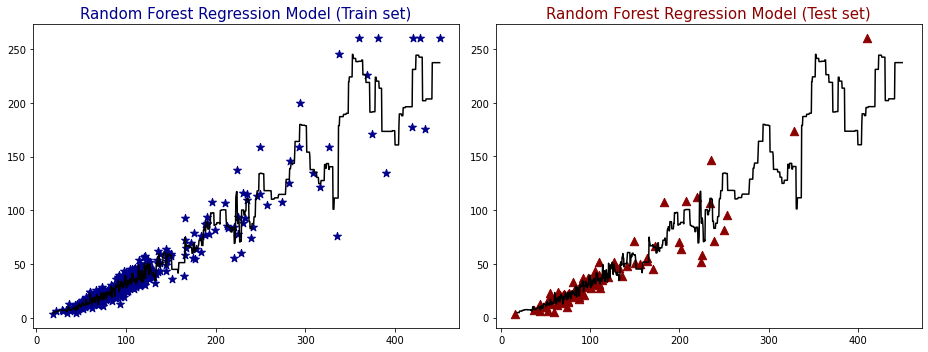

In [67]:
min_X, max_X= np.min(X_train),np.max(X_train)
X_grid= np.linspace(min_X, max_X, 1000).reshape(-1,1)
fig,ax= plt.subplots(ncols=2, figsize=(13,5))
# Train set
ax[0].scatter(X_train, y_train, color = 'darkblue', marker='*', s=70)
ax[0].plot(X_grid, regressor.predict(X_grid), color = 'black')
ax[0].set_title('Random Forest Regression Model (Train set)', color='darkblue', fontsize=15)
# Test set
ax[1].scatter(X_test,y_test, color = 'darkred', marker='^', s=70)
ax[1].plot(X_grid, regressor.predict(X_grid), color = 'black')
ax[1].set_title('Random Forest Regression Model (Test set)', color='darkred', fontsize=15)
fig.tight_layout()